In [2]:
import pandas as pd

# Load the dataset
file_path = 'sales_data_with_discounts.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
data.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [4]:
data.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [6]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [9]:
# Identify numerical columns
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
print("Numerical Columns:", numerical_cols)


Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [10]:
# Calculate basic statistical measures
stats = data[numerical_cols].agg(['mean', 'median', 'std']).transpose()

In [21]:
# Calculate mode separately as it returns a DataFrame
modes = data[numerical_cols].mode().transpose()

# Assign column name(s) to the DataFrame
modes.columns = ['mode'] * len(modes.columns)

# Extract the first column (if needed)
modes = modes.iloc[:, 0]


In [22]:
# Calculate mode separately
modes = data[numerical_cols].mode().iloc[0]

# Add mode to the stats DataFrame
stats['mode'] = modes

# Display the statistics
print(stats)

                           mean       median           std          mode
Volume                 5.066667     4.000000      4.231602      3.000000
Avg Price          10453.433333  1450.000000  18079.904840    400.000000
Total Sales Value  33812.835556  5700.000000  50535.074173  24300.000000
Discount Rate (%)     15.155242    16.577766      4.220602      5.007822
Discount Amount     3346.499424   988.933733   4509.902963     69.177942
Net Sales Value    30466.336131  4677.788059  46358.656624    326.974801


In [23]:
# Interpretation of statistics
for col in numerical_cols:
    mean_val = stats.loc[col, 'mean']
    median_val = stats.loc[col, 'median']
    mode_val = stats.loc[col, 'mode']
    std_val = stats.loc[col, 'std']
    
    print(f"\nColumn: {col}")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Standard Deviation: {std_val}")


Column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3.0
Standard Deviation: 4.231602391213926

Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400.0
Standard Deviation: 18079.90483993645

Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300.0
Standard Deviation: 50535.07417255328

Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


In [32]:
 # Brief interpretation
if mean_val > median_val:
        skew = 'right-skewed (positively skewed)'
elif mean_val < median_val:
        skew = 'left-skewed (negatively skewed)'
else:
        skew = 'symmetrical'

print(f"The distribution of {col} appears to be {skew}.")
print(f"The standard deviation of {col} indicates the spread of the data around the mean value.\n")


The distribution of Net Sales Value appears to be right-skewed (positively skewed).
The standard deviation of Net Sales Value indicates the spread of the data around the mean value.



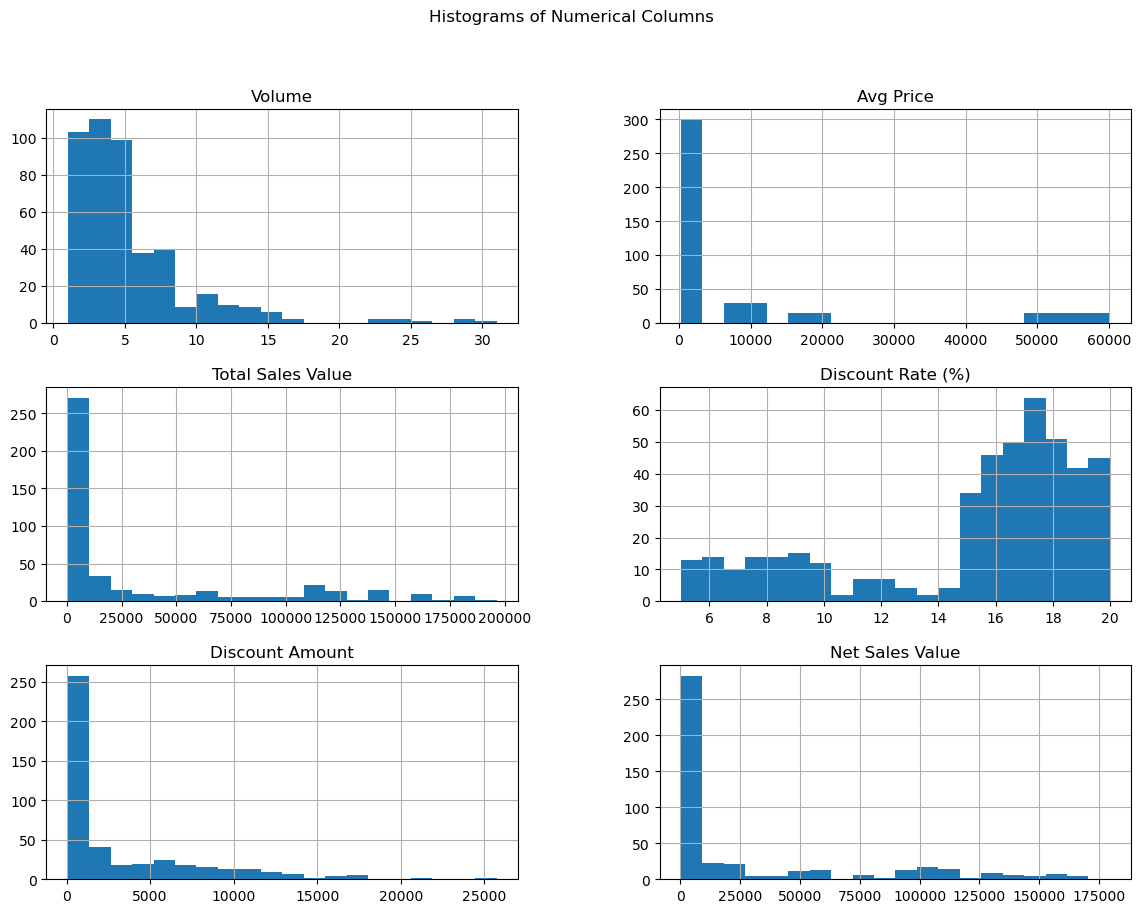

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data Visualization

# Histograms
data[numerical_cols].hist(bins=20, figsize=(14, 10), layout=(3, 2))
plt.suptitle('Histograms of Numerical Columns')
plt.show()


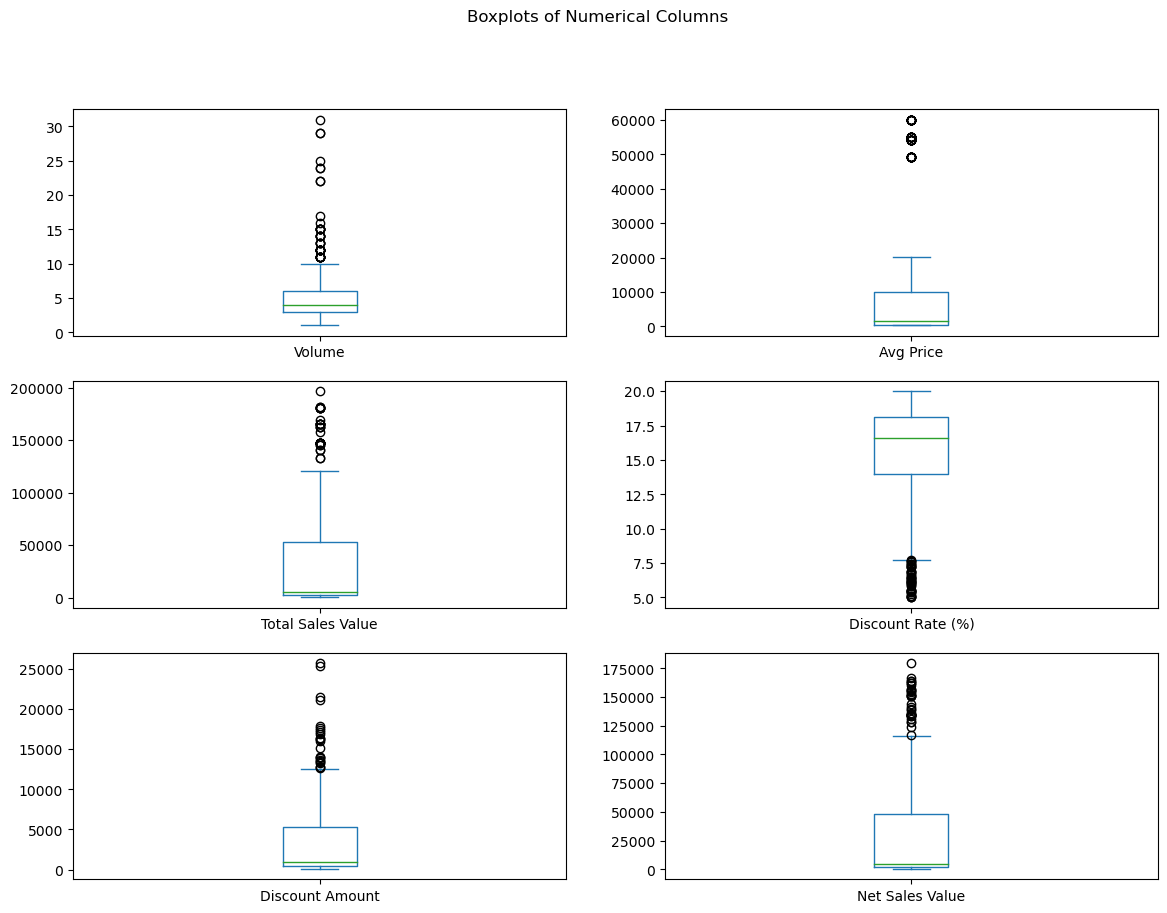

In [34]:
# Boxplots
data[numerical_cols].plot(kind='box', subplots=True, layout=(3, 2), figsize=(14, 10), title='Boxplots of Numerical Columns')
plt.suptitle('Boxplots of Numerical Columns')
plt.show()

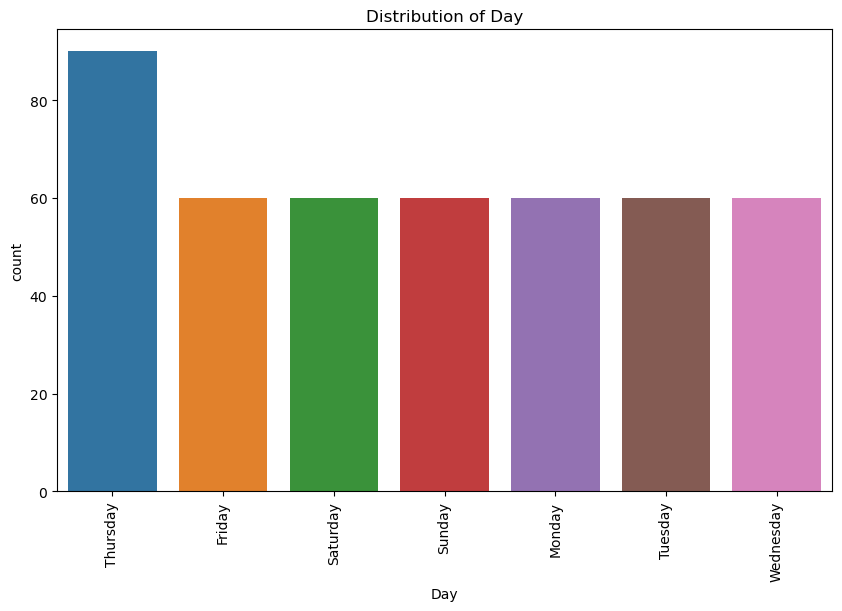

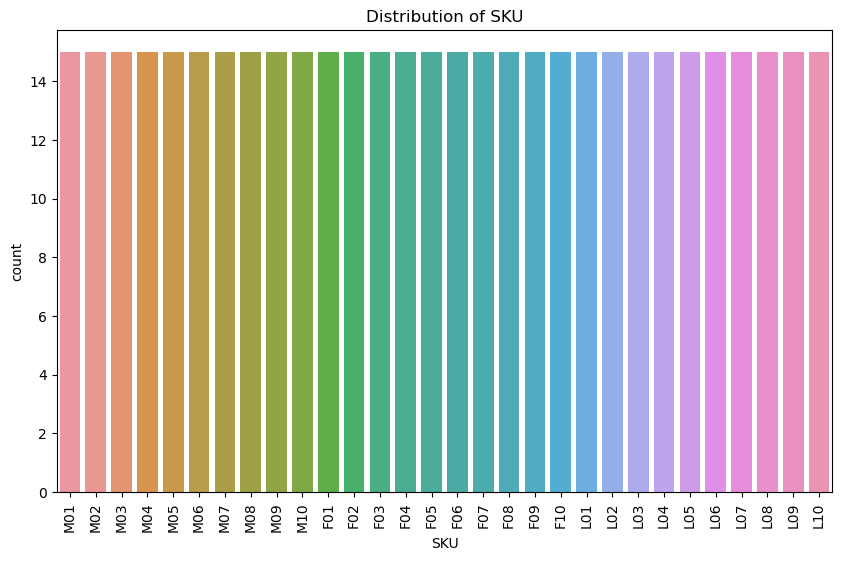

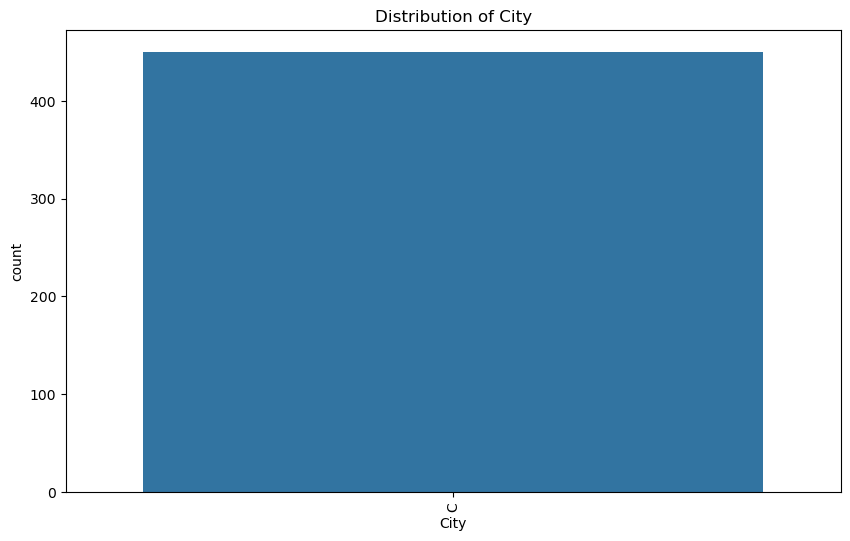

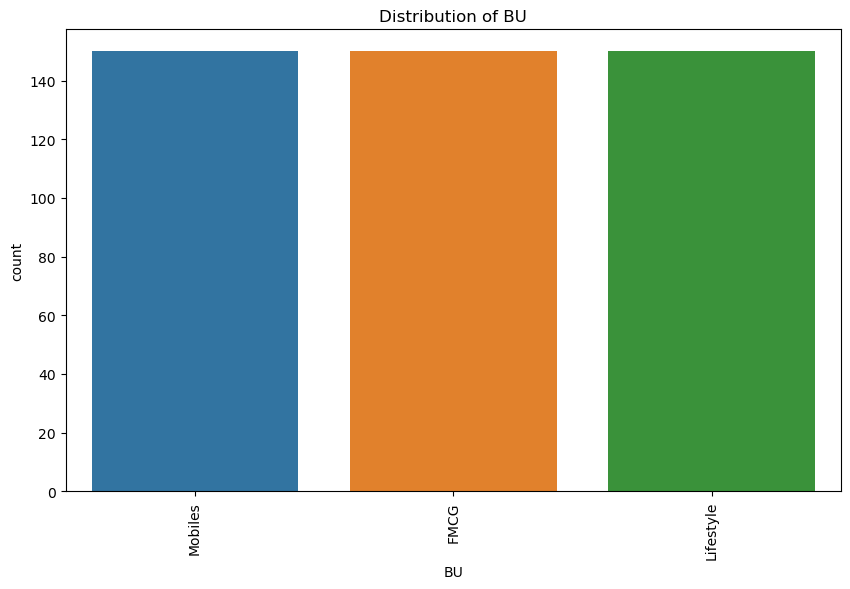

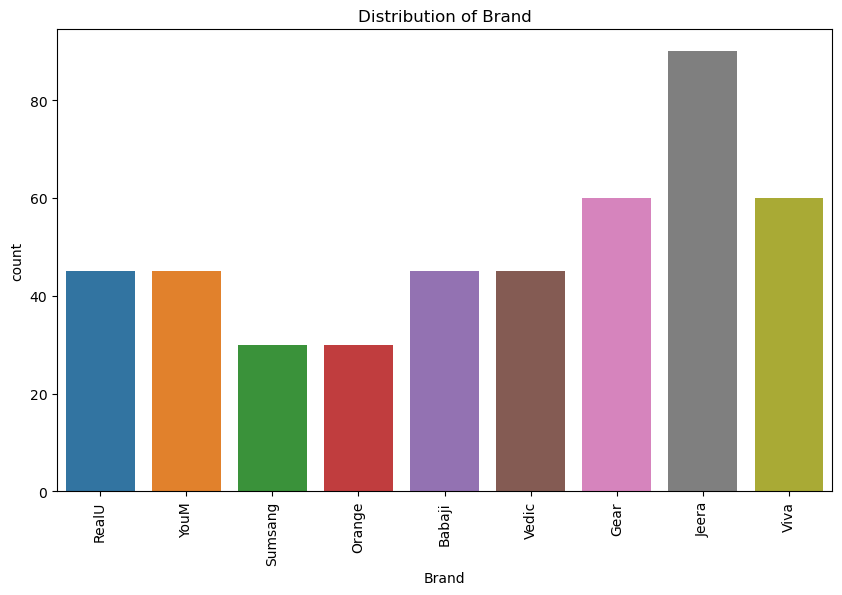

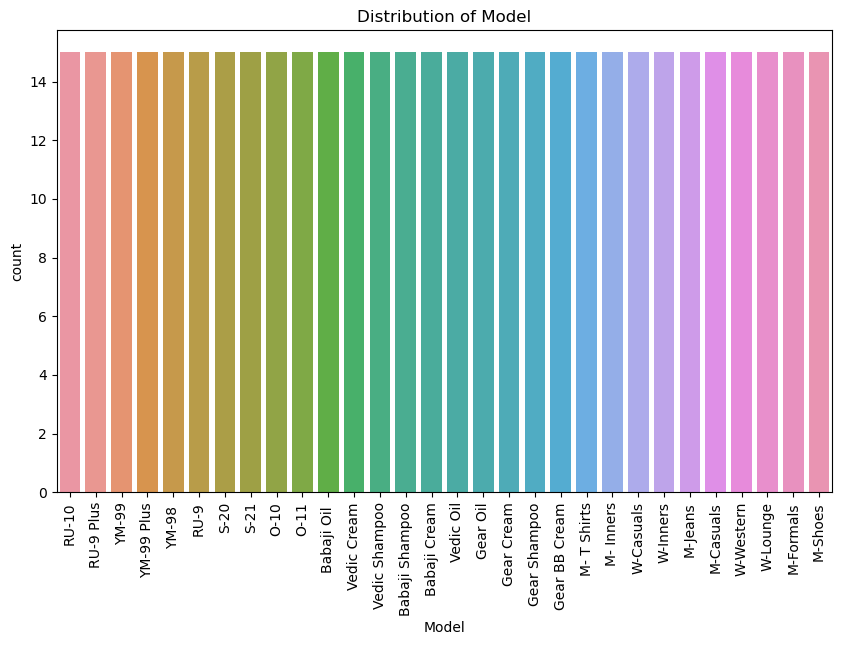

In [36]:
#Bar Chart Analysis for Categorical Columns
categorical_cols = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [37]:
# Standardization of Numerical Variables
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [38]:
# Display before and after standardization
print("Before Standardization:")
print(data[numerical_cols].head())

print("\nAfter Standardization:")
print(data_standardized[numerical_cols].head())

Before Standardization:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146     

In [39]:
# Conversion of Categorical Data into Dummy Variables
data_dummies = pd.get_dummies(data, columns=categorical_cols)

# Display a portion of the transformed dataset
print(data_dummies.head())

# Summary of key findings
print("\nSummary of Key Findings:")
print("1. Descriptive statistics calculated for numerical columns.")
print("2. Histograms and boxplots plotted for numerical columns to visualize distribution and outliers.")
print("3. Bar charts created for categorical columns to visualize category distribution.")
print("4. Numerical columns standardized using z-score normalization.")
print("5. Categorical columns converted to dummy variables for machine learning suitability.")


         Date  Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0  01-04-2021      15      12100             181500          11.654820   
1  01-04-2021      10      10100             101000          11.560498   
2  01-04-2021       7      16100             112700           9.456886   
3  01-04-2021       6      20100             120600           6.935385   
4  01-04-2021       3       8100              24300          17.995663   

   Discount Amount  Net Sales Value  Day_Friday  Day_Monday  Day_Saturday  \
0     21153.498820    160346.501180           0           0             0   
1     11676.102961     89323.897039           0           0             0   
2     10657.910157    102042.089843           0           0             0   
3      8364.074702    112235.925298           0           0             0   
4      4372.946230     19927.053770           0           0             0   

   ...  Model_Vedic Cream  Model_Vedic Oil  Model_Vedic Shampoo  \
0  ...                  0